<a href="https://colab.research.google.com/github/katarinagresova/M7DataSP_2020/blob/master/assignment_07/poetrybywords_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
to_exclude = '!"#$%&—.()*+-/;<=>@[\\]^_`{|}~\t,\'\n|'
tokenizer = Tokenizer(filters = to_exclude)

text = open('/content/drive/MyDrive/DSpraktikum/data/emily-together.txt').read()
text = text.replace('—', ' ') # pridane aby odstranilo dlhe -
corpus = text.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

'''
print(tokenizer.word_index)
print(total_words)
print(corpus)'''

'\nprint(tokenizer.word_index)\nprint(total_words)\nprint(corpus)'

In [32]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [33]:
model = Sequential()
model.add(Embedding(total_words, 256, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=50, verbose=1, batch_size=256)
#print model.summary()
print(model)


Epoch 1/50
107/107 [==============================] - 4s 37ms/step - loss: 7.2601 - accuracy: 0.0584
Epoch 2/50
107/107 [==============================] - 4s 36ms/step - loss: 6.4110 - accuracy: 0.0822
Epoch 3/50
107/107 [==============================] - 4s 35ms/step - loss: 5.7475 - accuracy: 0.1120
Epoch 4/50
107/107 [==============================] - 4s 35ms/step - loss: 4.9604 - accuracy: 0.1557
Epoch 5/50
107/107 [==============================] - 4s 36ms/step - loss: 4.1198 - accuracy: 0.2318
Epoch 6/50
107/107 [==============================] - 4s 35ms/step - loss: 3.4027 - accuracy: 0.3295
Epoch 7/50
107/107 [==============================] - 4s 34ms/step - loss: 2.8187 - accuracy: 0.4285
Epoch 8/50
107/107 [==============================] - 4s 34ms/step - loss: 2.3187 - accuracy: 0.5220
Epoch 9/50
107/107 [==============================] - 4s 34ms/step - loss: 1.9633 - accuracy: 0.5949
Epoch 10/50
107/107 [==============================] - 4s 34ms/step - loss: 1.7258 - accura

In [34]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

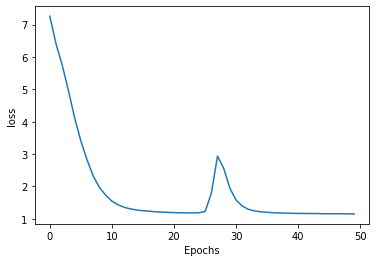

In [35]:
plot_graphs(history, 'loss')


In [36]:
seed_text = "truth"
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

truth never was not to a larger poor time will weigh me to me to be us now thrown his name or the bee proclaimed him is best water run home away water seemed er it like a feat heat? the brother reply the way next often reward us ne er


In [38]:

model.save('/content/drive/MyDrive/DSpraktikum/model1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DSpraktikum/model1/assets
